In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [6]:
df_1 = pd.read_csv('banvic_data/clientes.csv')

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_cliente      998 non-null    int64 
 1   primeiro_nome    998 non-null    object
 2   ultimo_nome      998 non-null    object
 3   email            998 non-null    object
 4   tipo_cliente     998 non-null    object
 5   data_inclusao    998 non-null    object
 6   cpfcnpj          998 non-null    object
 7   data_nascimento  998 non-null    object
 8   endereco         998 non-null    object
 9   cep              998 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.1+ KB


In [53]:
#Mudar data de nascimento para datetime
df_1['data_nascimento'] = pd.to_datetime(df_1['data_nascimento'])

In [54]:
#criando uma coluna chamada idade atual 
df_1['idade_atual'] = df_1['data_nascimento'].apply(lambda x: datetime.now().year - x.year - ((datetime.now().month, datetime.now().day) < (x.month, x.day)))

In [13]:
#criando coluna chamada faixa etária
#Definir faixas etárias
faixas_etarias = pd.cut(df_1['idade_atual'], bins=[0, 18, 25, 35, 45, 55, 65, 100], labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+'])

#criar coluna faixa etária
df_1['faixa_etaria'] = faixas_etarias

In [18]:
df_1['faixa_etaria'].value_counts().sort_index()

faixa_etaria
0-18      32
19-25    105
26-35    147
36-45    158
46-55    149
56-65    146
66+      261
Name: count, dtype: int64

In [ ]:
#Grande parte dos clientes estão acima de 66 anos - é preciso criar mais benefícios para atrair os mais jovens

In [29]:
df_1['tipo_cliente'].nunique()

1

In [ ]:
#Todos os clientes têm conta de Pessoa Física

In [38]:
df_1['endereco'].head(11)

0     Praia de Duarte Vila Piratininga 81327-166 Fer...
1     Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...
2     Jardim de Rodrigues Ipiranga 14161-477 Duarte ...
3     Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...
4        Rua Correia, 889 Diamante 59123250 Aragão / RS
5     Favela de da Mata, 3 Conjunto Novo Dom Bosco 7...
6     Esplanada Maria Luiza Ribeiro, 4 Conjunto Cali...
7     Ladeira Elisa da Rocha, 69 João Pinheiro 13964...
8     Passarela Lucca Castro, 73 Vila Paris 99268696...
9     Fazenda Emanuel Gomes, 6 Cruzeiro 29428-910 No...
10    Lago de Moraes, 592 Mirtes 10935-233 Nasciment...
Name: endereco, dtype: object

In [44]:
#Função para encontrar na coluna endereço a informação sobre o Estado de residência dos clientes
def extrair_estado(endereco):
    padrao_estado = r'/\s*([A-Z]{2})\b'
    #Extraindo a informação de Estado usando Regex
    estado = re.search(padrao_estado, endereco)
    if estado:
        estado = estado.group(1)
    else:
        estado = none
    return estado

df_1['estado'] = df_1['endereco'].apply(lambda x: extrair_estado(x))


In [55]:
#O banco tem cliente em todos os estados a pesar de ter apenas 9 agências físicas. 
#Grande parte do público utiliza os recursos digitais

In [50]:
df_1['estado'].value_counts().sort_index()

estado
AC    38
AL    40
AM    53
AP    35
BA    34
CE    43
DF    33
ES    49
GO    34
MA    44
MG    40
MS    47
MT    28
PA    33
PB    37
PE    28
PI    31
PR    33
RJ    32
RN    34
RO    25
RR    41
RS    35
SC    37
SE    29
SP    48
TO    37
Name: count, dtype: int64

In [ ]:
#Agências físicas em 5 estados - SP, RS, RJ, SC, PE. Clientes em todos os estados da Federação

In [58]:
df_1.groupby(['estado', 'faixa_etaria'],  observed=True).size().unstack(fill_value=0)

faixa_etaria,0-18,19-25,26-35,36-45,46-55,56-65,66+
estado,,,,,,,
AC,3,4,6,7,4,2,12
AL,1,5,11,4,5,5,9
AM,3,4,10,10,7,5,14
AP,0,1,8,8,3,8,7
BA,1,3,3,6,6,6,9
CE,1,2,10,6,5,10,9
DF,1,2,5,4,3,7,11
ES,0,7,10,6,4,9,13
GO,0,5,6,2,7,3,11


In [60]:
distribuicao = df_1.groupby(['estado', 'faixa_etaria'],  observed=True).size().unstack(fill_value=0)

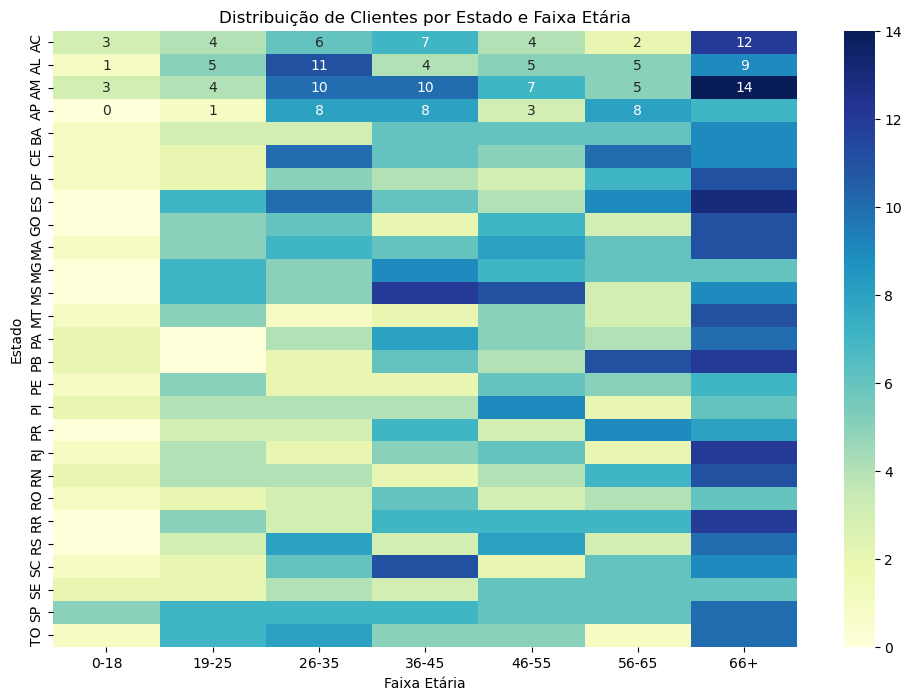

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(distribuicao, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Distribuição de Clientes por Estado e Faixa Etária')
plt.ylabel('Estado')
plt.xlabel('Faixa Etária')
plt.show()

In [ ]:
#É possível verificar a distribuição de 